In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

<AxesSubplot:xlabel='x'>

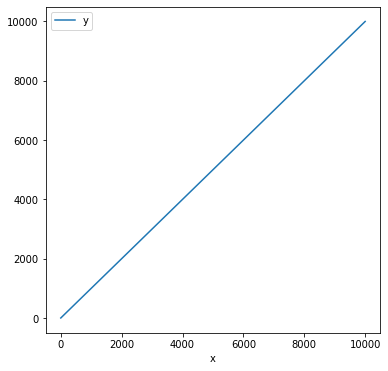

In [112]:
t = pd.DataFrame()
t

,t,step
0,1.000004,0
1,1.000008,0
2,1.000012,0
3,1.000016,0
4,1.000020,0
...,...,...
98896,1.395580,0
98897,1.395584,0
98898,1.395588,0
98899,1.395592,1


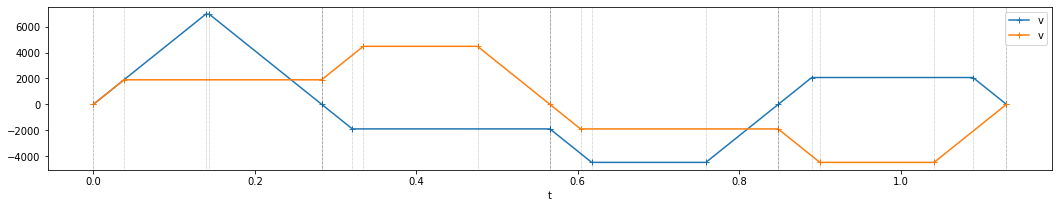

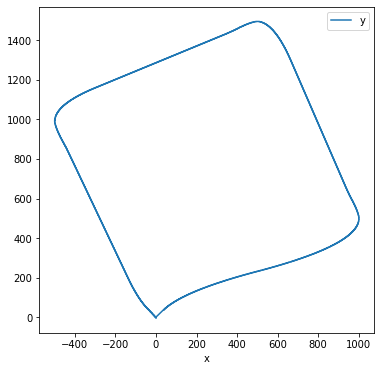

In [157]:
def step_plot(sl):
    
    frames = [[], []]
    t0 = 0
    next_t = 0
    for s in sl.segments: # Each segment is a move
        
        for axis_i,b in enumerate(s.blocks): # Each block is an axis in a move
            frames[axis_i].extend(list(b.iter_steps(t0)))
        t0 = max(e[0] for f in frames for e in f)

    t1 = pd.DataFrame(frames[0], columns=['t','x']).set_index('t')
    t2 = pd.DataFrame(frames[1], columns=['t','y']).set_index('t')

    t = t1.join(t2).cumsum()
    t.plot('x','y', figsize=(6,6))
    
    return t

j = Joint(10_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000

sl.move([1000,500])
sl.move([-500,1000])
sl.move([-1000,-500])
sl.move([500,-1000])
sl.plot()
df = step_plot(sl) 



In [149]:
df

,x,y
t,,
0.000004,0,0.0
0.000008,0,0.0
0.000012,0,0.0
0.000016,0,0.0
0.000020,0,0.0
...,...,...
0.952632,3002,NaN
0.952636,3002,NaN
0.952640,3002,NaN


In [150]:
t = pd.DataFrame(list(sl[1][1].iter_steps()), columns=['t','x'])
t.sum()

t    9697.927284
x    1000.000000
dtype: float64

,t,axis0,axis1
0,0.000000,0.0,NaN
3,0.000004,0.0,0.0
24,0.000012,0.0,0.0
39,0.000024,0.0,0.0
54,0.000040,0.0,0.0


,t,axis0,axis1
0,0.000000,0.0,NaN
3,0.000004,0.0,0.0
24,0.000012,0.0,0.0
39,0.000024,0.0,0.0
54,0.000040,0.0,0.0


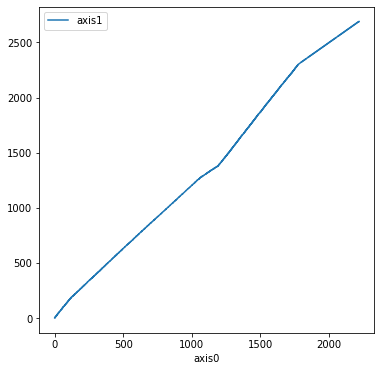

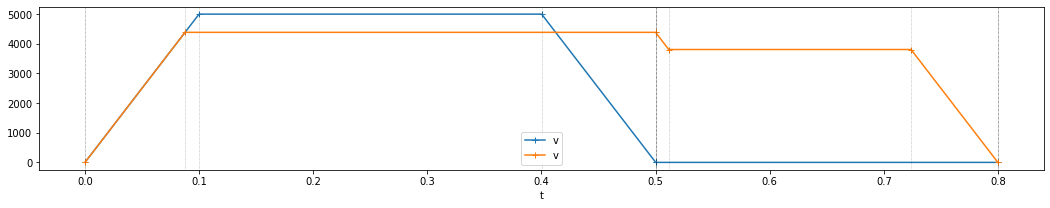

In [72]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([0,1000])

    
df = step_plot(sl)  
sl.plot()
df.head()

,t,axis0,axis1
0,0.000000,0,0
144,0.000004,0,0
1993,0.000012,0,0
2834,0.000024,0,0
3675,0.000040,0,0


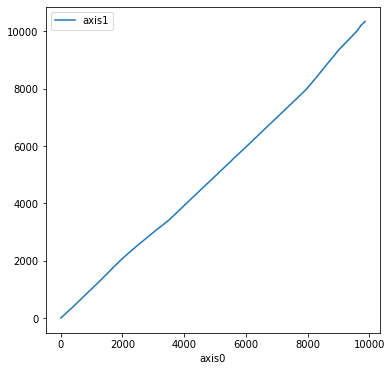

In [73]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  
x = 2000
for i in range(4):
    sl.move([x,x/2,x/4,0])
    sl.move([0,x,x/2,x/4])
    sl.move([x/4,0,x,x/2])
    sl.move([x/2,x/4,0,x])

    
_ = step_plot(sl)  

,t,axis0,axis1
0,0.000004,0,0
361,0.000012,0,0
482,0.000024,0,0
603,0.000040,0,0
724,0.000060,0,0


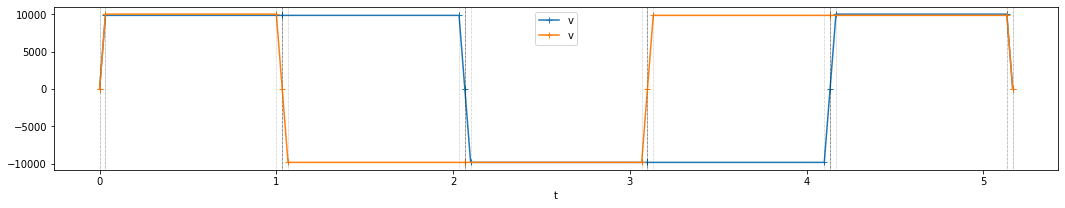

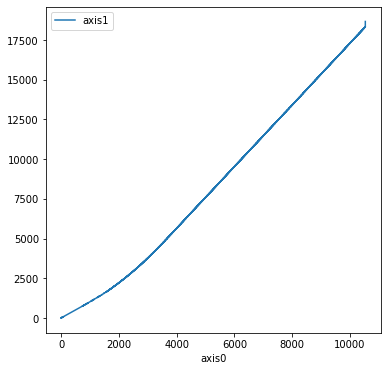

In [75]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
_=step_plot(sl) 

,t,axis0,axis1
0,0.000000,0.0,NaN
3,0.000004,0.0,0.0
63,0.000012,0.0,0.0
111,0.000024,0.0,0.0
159,0.000040,0.0,0.0


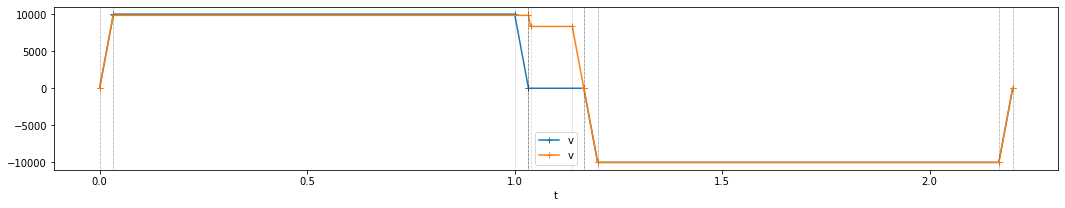

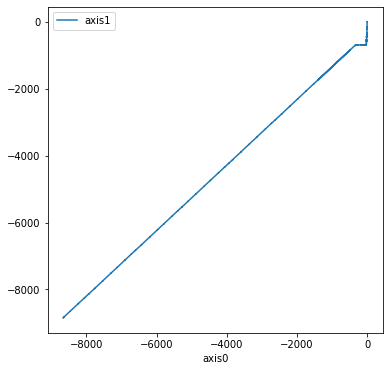

In [76]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([0,1000])
sl.move([-x,-x])
 
sl.plot()
_ = step_plot(sl) 

In [ ]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 


j = Joint(10_000, 500_000)
joints = [j]*2

sl = SegmentList(joints)   
r = 10000
n = 100
lx  = 0
ly = 0
for i in range(1,n+1):
    a = 2*np.pi*(i/n)
    x = sin(a)*r 
    y = cos(a)*r 
    if sqrt(x**2+y**2) > 1000:
        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y


_ = sl.plot()

In [ ]:
%%time 

    
_ = step_plot(sl)